<h1>Conceito</h1>

<h2>Hiperparâmetros</h2>

Hiperparâmetros são parâmetros que não são diretamente 'aprendidos' pelos estimadores. Na biblioteca *SKLearn* por exemplo, eles são passados como argumentos para o construtor da classe de estimador.

Exemplos de hiperparâmetros são:
- C, kernell e gamma para classificadores de vetores de suporte
- Profundidade máxima para árvores de decisão
- Número de *epochs*

<h2><i>Overfitting</i></h2>

O *overfitting* acontece quando um modelo se ajusta muito bem ao conjunto de dados anteriormente observados, mas é ineficaz para prever novos resultados. Isso pode acontecer por diferentes motivos, desde uma base de dados de treino 'enviesada' até valores de hiperparâmetros.

Um exemplo disso é o caso em que se aumenta indefinidamente a profundidade máxima de uma árvore de decisão: intuitivamente, imagina-se que o modelo irá se tornar mais eficaz. Porém, a partir de uma certa profundidade, ele irá se tornar mais eficaz apenas em prever os dados de treino, mas não em prever novos dados.

<h1>Aplicação</h1>

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importando a base de dados
dados = pd.read_csv(r'Dados\base.csv')
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [3]:
# Dividindo inputs e outputs
x = dados[['preco', 'idade_do_modelo', 'km_por_ano']].values
y = dados['vendido'].values.ravel()

In [4]:
# Criando função para treinar n árvores de decisão com diferentes max_depths e retornar seus resultados em um dataframe

def dtc_maxdepth_cv(maxdepth, x, y, SEED=20):

    columns = [
        ['', 'Teste', 'Teste', 'Teste', 'Treino', 'Treino', 'Treino'],
        ['Max depth', 'Acurácia mínima', 'Acurácia média', 'Acurácia máxima', 'Acurácia mínima', 'Acurácia média', 'Acurácia máxima']
    ]

    df_resultados = pd.DataFrame(columns=columns)

    for i in range(maxdepth):

        np.random.seed(SEED)

        resultados = cross_validate(
            DecisionTreeClassifier(max_depth=i+1),
            x,
            y,
            cv = KFold(n_splits=10, shuffle=True),
            return_train_score=True
        )

        acc_min_test = (resultados['test_score'].mean() - resultados['test_score'].std()) * 100
        acc_mean_test = resultados['test_score'].mean() * 100
        acc_max_test = (resultados['test_score'].mean() + resultados['test_score'].std()) * 100
        acc_min_train = (resultados['train_score'].mean() - resultados['train_score'].std()) * 100
        acc_mean_train = resultados['train_score'].mean() * 100
        acc_max_train = (resultados['train_score'].mean() + resultados['train_score'].std()) * 100

        df_resultados = pd.concat([df_resultados,
                                   pd.DataFrame(data=[[i+1, acc_min_test, acc_mean_test, acc_max_test, acc_min_train, acc_mean_train, acc_max_train]], columns=columns)],
                                   axis = 0,
                                   ignore_index=True)
    
    return df_resultados

In [5]:
teste_maxdepth = dtc_maxdepth_cv(30, x, y, SEED=20)

In [6]:
teste_maxdepth

Teste                                         Treino   
   Max depth Acurácia mínima Acurácia média Acurácia máxima Acurácia mínima   
0          1       74.568555          75.78       76.991445       75.656506  \
1          2       74.568555          75.78       76.991445       75.656506   
2          3       77.578739          78.69       79.801261       78.629579   
3          4       77.483972          78.64       79.796028       78.663736   
4          5       77.455584          78.59       79.724416       78.759007   
5          6       77.257348          78.39       79.522652       79.031479   
6          7       76.817146          78.15       79.482854       79.223534   
7          8       76.621790          77.85       79.078210       79.575908   
8          9       76.650703          77.86       79.069297       80.015702   
9         10       76.445928          77.59       78.734072       80.534383   
10        11       75.884778          77.18       78.475222       81.218543   
11        12       75.205467          76.41       77.614533       82.023740   
12        13       75.159840          76.41       77.660160       82.847400   
13        14       74.116032          75.63       77.143968       83.744518   
14        15       73.837180          75.47       77.102820       84.775828   
15        16       73.529497          75.02       76.510503       85.741778   
16        17       73.467652          74.64       75.812348       86.718605   
17        18       73.179187          74.41       75.640813       87.774018   
18        19       72.634752          74.20       75.765248       88.733943   
19        20       72.614739          74.10       75.585261       89.689715   
20        21       72.521074          74.01       75.498926       90.413043   
21        22       72.055519          73.62       75.184481       91.266240   
22        23       72.052130          73.53       75.007870       92.039281   
23        24       72.094302          73.08       74.065698       92.703975   
24        25       71.736408          73.13       74.523592       93.472444   
25        26       71.555360          72.98       74.404640       94.086597   
26        27       71.844848          73.08       74.315152       94.744356   
27        28       71.468852          72.82       74.171148       95.256641   
28        29       71.329522          72.48       73.630478       95.772329   
29        30       70.966397          72.37       73.773603       96.271418   

                                   
   Acurácia média Acurácia máxima  
0       75.791111       75.925716  
1       75.791111       75.925716  
2       78.754444       78.879310  
3       78.800000       78.936264  
4       78.911111       79.063216  
5       79.172222       79.312965  
6       79.411111       79.598688  
7       79.876667       80.177425  
8       80.353333       80.690965  
9       80.987778       81.441172  
10      81.798889       82.379235  
11      82.662222       83.300704  
12      83.604444       84.361489  
13      84.684444       85.624371  
14      85.798889       86.821950  
15      86.903333       88.064889  
16      88.032222       89.345840  
17      89.071111       90.368204  
18      90.058889       91.383835  
19      91.043333       92.396952  
20      91.807778       93.202513  
21      92.702222       94.138204  
22      93.446667       94.854053  
23      94.151111       95.598247  
24      94.850000       96.227556  
25      95.472222       96.857847  
26      96.060000       97.375644  
27      96.557778       97.858915  
28      97.002222       98.232115  
29      97.452222       98.633026

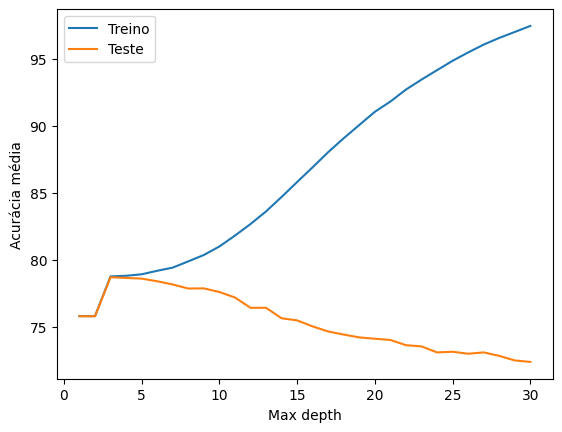

In [7]:
sns.lineplot(x = ('', 'Max depth'), y = ('Treino', 'Acurácia média'), data = teste_maxdepth, label = 'Treino').set(xlabel ="Max depth", ylabel = "Acurácia média")
sns.lineplot(x = ('', 'Max depth'), y = ('Teste', 'Acurácia média'), data = teste_maxdepth, label = 'Teste').set(xlabel ="Max depth", ylabel = "Acurácia média")

plt.legend()

plt.show()

Como foi possível ver no exemplo acima, **a partir de uma certa profundidade o modelo aumenta apenas sua acurácia de treino e acaba até perdendo acurácia de teste**